# WEB SCRAPING PROJECT - CRYPTO CURRENCY ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from bs4 import BeautifulSoup 
import requests

# MARKDOWN

In [3]:
url = 'https://www.coingecko.com/en' # storing link

In [4]:
response = requests.get(url) # connecting/ requesting access to website

In [5]:
resp.status_code # approval status - '200' means website has given permission to access its data

200

In [6]:
soup = BeautifulSoup(resp.content, 'html.parser') # storing all html conctent in one variable

In [7]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>CoinGecko: Cryptocurrency Prices and Market Capitalization</title>
<meta content="Get cryptocurrency prices, market overview, and analysis such as crypto market cap, trading volume, and more." name="description">
<link as="font" crossorigin="" href="https://static.coingecko.com/webfonts/fa-solid-900.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" href="https://static.coingecko.com/webfonts/fa-brands-400.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" href="https://static.coingecko.com/webfonts/fa-regular-400.woff2" rel="preload" type="font/woff2"/>
<link href="https://cdn-s2s.buysellads.net" rel="pr

In [8]:
data = soup.find('table',{'class':'table-scrollable'}).find('tbody').find_all('tr') # recording first row

In [9]:
len(results)

100

In [ ]:
# ACCESSING EACH ELEMENT OF ROW 1

In [10]:
data[0].find('a',{'class':'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip()

'Bitcoin'

In [11]:
data[0].find('td',{'class':'td-price'}).get_text().strip()

'$42,531'

In [12]:
data[0].find('td',{'class':'td-change1h'}).get_text().strip()

'-0.1%'

In [13]:
data[0].find('td',{'class':'td-change24h'}).get_text().strip()

'1.9%'

In [14]:
data[0].find('td',{'class':'td-change7d'}).get_text().strip()

'5.3%'

In [15]:
data[0].find('td',{'class':'td-liquidity_score'}).get_text().strip()

'$30,030,156,553'

In [16]:
data[0].find('td',{'class':'td-market_cap'}).get_text().strip()

'$800,926,474,171'

In [17]:
# lists created to append 
name = []
price = []
change_1h = []
change_24h = []
change_7d = []
volume_24h = []
market_cap = []

In [18]:
# looping for all rows and appending to lists
for result in results:
    name.append(data.find('a',{'class':'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip())
    
    price.append(data.find('td',{'class':'td-price'}).get_text().strip())
    
    change_1h.append(data.find('td',{'class':'td-change1h'}).get_text().strip())
    
    change_24h.append(data.find('td',{'class':'td-change24h'}).get_text().strip())
    
    change_7d.append(data.find('td',{'class':'td-change7d'}).get_text().strip())
                     
    volume_24h.append(data.find('td',{'class':'td-liquidity_score'}).get_text().strip())
                     
    market_cap.append(data.find('td',{'class':'td-market_cap'}).get_text().strip())
    

In [19]:
len(name)

100

In [20]:
len(market_cap)

100

In [21]:
# creating data frame 
crypto_curr_df = pd.DataFrame({'Name':name,'Price':price,'Change in 1 hour':change_1h,'Change in 24 hours':change_24h,'Change in 7 days':change_7d,'Volume of trade in 24 hours':volume_24h,'Market Capitalization':market_cap})

In [22]:
crypto_curr_df.head(10)

,Name,Price,Change in 1 hour,Change in 24 hours,Change in 7 days,Volume of trade in 24 hours,Market Capitalization
0,Bitcoin,"$42,531",-0.1%,1.9%,5.3%,"$30,030,156,553","$800,926,474,171"
1,Ethereum,"$2,928.49",-0.2%,1.1%,6.7%,"$19,416,857,244","$345,364,147,202"
2,Tether,$1.00,-0.1%,0.3%,1.3%,"$60,830,185,826","$69,733,188,132"
3,Cardano,$2.13,-0.1%,0.6%,7.8%,"$2,494,254,717","$68,190,435,564"
4,Binance Coin,$345.44,-0.2%,3.0%,0.5%,"$1,270,922,726","$53,441,666,148"
5,XRP,$0.922948,-0.4%,-0.2%,6.5%,"$3,597,247,820","$43,204,742,238"
6,Solana,$139.06,-0.6%,3.2%,13.3%,"$2,693,296,993","$41,401,940,193"
7,USD Coin,$1.00,-0.1%,0.2%,0.9%,"$4,619,484,676","$31,366,057,884"
8,Polkadot,$27.83,-0.2%,1.6%,7.3%,"$1,150,411,245","$28,833,814,146"
9,Dogecoin,$0.201233,-0.1%,0.4%,0.8%,"$782,881,079","$26,463,423,051"


In [40]:
crypto_curr_df.to_csv('CRYPTO - ETE - SCRAPED_DATASET')

# EDA

In [23]:
df = pd.read_excel('PYTHON - ETE - FINAL DATA.xlsx')

In [24]:
df.head()

,Name,Price,Change in 1 hour,Change in 24 hours,Change in 7 days,Volume of trade in 24 hours,Market Capitalization
0,Bitcoin,41300.00,-0.011,-0.045,-0.038,30849992044,777620805306
1,Ethereum,2821.21,-0.018,-0.068,-0.052,19176965876,332096302170
2,Tether,1.00,-0.002,-0.004,0.002,62007306211,69426438044
3,Cardano,2.05,-0.022,-0.063,-0.017,2194616612,65618788624
4,Binance Coin,332.50,-0.018,-0.033,-0.086,1409531913,51419874237


In [25]:
df.describe()

,Price,Change in 1 hour,Change in 24 hours,Change in 7 days,Volume of trade in 24 hours,Market Capitalization
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,1653.386877,-0.016640,-0.045460,-0.022860,1.675337e+09,1.794729e+10
std,7575.291911,0.008438,0.046987,0.170298,7.110625e+09,8.422791e+10
min,0.000007,-0.040000,-0.140000,-0.365000,1.619610e+05,9.077765e+08
25%,1.000000,-0.022000,-0.074250,-0.101000,5.825997e+07,1.525724e+09
50%,6.805000,-0.017000,-0.057000,-0.049500,2.123953e+08,3.082422e+09
75%,63.245000,-0.013000,-0.026750,-0.002000,7.744105e+08,6.060583e+09
max,41438.000000,0.011000,0.133000,1.068000,6.200731e+10,7.776208e+11


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         100 non-null    object 
 1   Price                        100 non-null    float64
 2   Change in 1 hour             100 non-null    float64
 3   Change in 24 hours           100 non-null    float64
 4   Change in 7 days             100 non-null    float64
 5   Volume of trade in 24 hours  100 non-null    int64  
 6   Market Capitalization        100 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 5.6+ KB


C:\Users\Jyothi Nadig\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

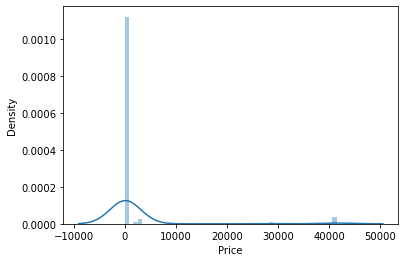

In [27]:
sns.distplot(df.Price)

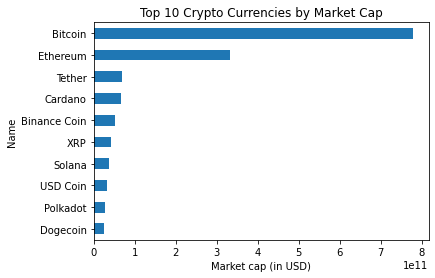

In [30]:
ax = df.groupby(['Name'])['Market Capitalization'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in USD)");
plt.title("Top 10 Crypto Currencies by Market Cap");

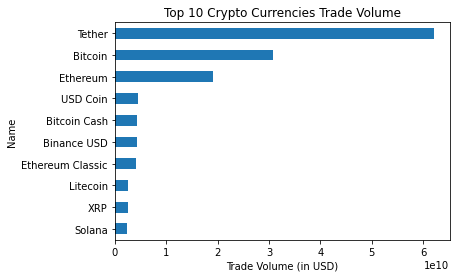

In [29]:
ax = df.groupby(['Name'])['Volume of trade in 24 hours'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Trade Volume (in USD)");
plt.title("Top 10 Crypto Currencies Trade Volume");

In [31]:
top_5_currency_names = df.groupby(['Name'])['Price'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['Name'].isin(top_5_currency_names)]
data_top_5_currencies[['Name','Price']]

,Name,Price
0,Bitcoin,41300.00
1,Ethereum,2821.21
19,Wrapped Bitcoin,41293.00
69,Huobi BTC,41438.00
91,yearn.finance,28359.00


<AxesSubplot:>

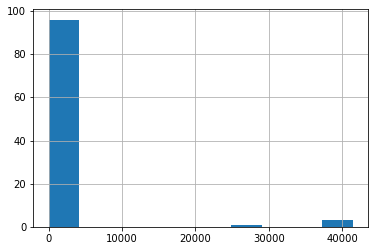

In [32]:
df['Price'].hist()

In [35]:
top_5_vol = df.groupby(['Name'])['Change in 1 hour'].last().sort_values(ascending=True).head(5).index
data_top_5_vola = df[df['Name'].isin(top_5_vol)]
data_top_5_vola[['Name','Change in 1 hour']]

,Name,Change in 1 hour
10,Avalanche,-0.030
31,eCash,-0.040
41,Quant,-0.032
61,Amp,-0.037
93,Mina Protocol,-0.031


In [36]:
top_5_vol = df.groupby(['Name'])['Change in 24 hours'].last().sort_values(ascending=True).head(5).index
data_top_5_vola = df[df['Name'].isin(top_5_vol)]
data_top_5_vola[['Name','Change in 24 hours']]

,Name,Change in 24 hours
12,Terra,-0.140
41,Quant,-0.103
74,Harmony,-0.113
80,Decred,-0.104
99,Curve DAO Token,-0.100


In [38]:
top_5_vol = df.groupby(['Name'])['Change in 7 days'].last().sort_values(ascending=True).head(5).index
data_top_5_vola = df[df['Name'].isin(top_5_vol)]
data_top_5_vola[['Name','Change in 7 days']]

,Name,Change in 7 days
24,Filecoin,-0.257
51,IOTA,-0.165
80,Decred,-0.209
83,Huobi Token,-0.365
98,Qtum,-0.147


# LINEAR REGRESSION

In [1]:
df1 = pd.read_excel('PYTHON - ETE - FINAL DATA.xlsx')

<IPython.core.display.Javascript object>

In [43]:
df1.head()

,Name,Price,Change in 1 hour,Change in 24 hours,Change in 7 days,Volume of trade in 24 hours,Market Capitalization
0,Bitcoin,41300.00,-0.011,-0.045,-0.038,30849992044,777620805306
1,Ethereum,2821.21,-0.018,-0.068,-0.052,19176965876,332096302170
2,Tether,1.00,-0.002,-0.004,0.002,62007306211,69426438044
3,Cardano,2.05,-0.022,-0.063,-0.017,2194616612,65618788624
4,Binance Coin,332.50,-0.018,-0.033,-0.086,1409531913,51419874237


In [3]:
y = df1.iloc[:,1]
y.head()

0    41300.00
1     2821.21
2        1.00
3        2.05
4      332.50
Name: Price, dtype: float64

In [5]:
x = df1.iloc[:,2:]
x.head()

,Change in 1 hour,Change in 24 hours,Change in 7 days,Volume of trade in 24 hours,Market Capitalization
0,-0.011,-0.045,-0.038,30849992044,777620805306
1,-0.018,-0.068,-0.052,19176965876,332096302170
2,-0.002,-0.004,0.002,62007306211,69426438044
3,-0.022,-0.063,-0.017,2194616612,65618788624
4,-0.018,-0.033,-0.086,1409531913,51419874237


In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [8]:
print(regressor.coef_)

[ 1.31883936e+05 -8.94077557e+02 -1.09331990e+01 -1.27814957e-07
  4.86090812e-08]


In [9]:
accuracy=regressor.score(x,y)
"Accuracy={}%".format(int(round(accuracy*100)))

'Accuracy=26%'

In [1]:
print("End of Program")

End of Program
